# 머신러닝, 딥러닝 IRIS템플릿

## > 머신러닝, 딥러닝 IRIS템플릿 목적
- 간단하게 쉽게 머신러닝, 딥러닝 모델링 만들기
- 잘 몰라도 아래 순서에 맞게 , 이런식으로 실행하면 되겠구나 느끼기
- 여러분이 처음 한다고 생각하고 템플릿 작성함

## > 모델링 프로세스
1. 데이터 가져오기
2. 데이터 분석
3. X , y 나누기
4. 머신러닝 모델링
5. 딥러닝 모델링
6. 딥러닝 성능 평가

---

# 1. 데이터 가져오기
- 먼저, 데이터가 있어야 모델링을 만들수 있다.
- 데이터 가져오는 방법에는 여러가지 있다.
 - 본인 데이터를 직접 올리는 방법
 - 기존에 제공하는 데이터 가져다 쓰는 방법

In [ ]:
# 필요한 라이브러리 가져오기
# 그냥 무조건 가져온다고 생각하자 : pandas, numpy, seaborn, matplotlib.pyplot
# seaborn 설치가 되어 있지 않으면 라이브러리는 설치 필요 : !pip install seaborn
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Seaborn에서 제공하는 데이터셋 확인하기
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

#### IRIS 데이터셋 가져오기

In [ ]:
# 많이 사용하는 데이터는 'iris' , 'tips' , 'titanic'
# 그중에서 iris 데이터셋 가져오기 
# seaborn load_dataset('iris') 함수 활용 : 결과 iris 저장

iris = sns.load_dataset('iris')

In [ ]:
# 가져온 iris 데이터 앞 5개 확인 하기
# 자동으로 판다스 데이터프레임 형식으로 읽어짐

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![IRIS](https://blog.kakaocdn.net/dn/CJCHb/btqS1WqufxB/IMgacd6IXsCl2LLgm1lykK/img.png)

# 2. 데이터 분석
- 눈으로 데이터 수치를 보고 어떤 흐름인지 파악할수 있지만,
- 시각화를 통한다면 쉽게 흐름을 파악할수 있으니, 할수 있으면 사용해라.
- 여러분에게는 어려울수 있으니, 아, 이렇게 데이터를 가지고 시각화를 할수 있구나 느낀면 된다.

In [ ]:
# 간단하게 시각화해 보기
# 여러분은 잘 모르지만, 나중에 이렇게 시각화를 할수 있구나 알기

# value_counts 함수 이용해서 species 컬럼에 대한 분포 확인

iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

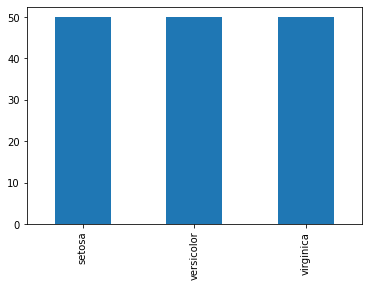

In [ ]:
# value_counts 함수 이용해서 species 컬럼에 대한 분포 확인값을 bar 차트 그리기

iris['species'].value_counts().plot(kind='bar')

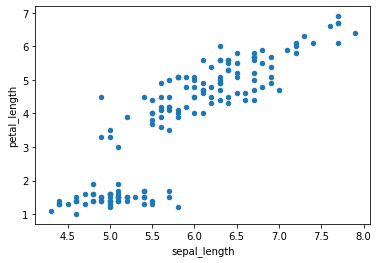

In [ ]:
# 판다스 plot 함수 활용해 산점도(scatter) 그래프 시각화해 보기
# 입력 : kind='scatter', x='sepal_length', y='petal_length'


iris.plot(kind='scatter', x='sepal_length', y='petal_length')

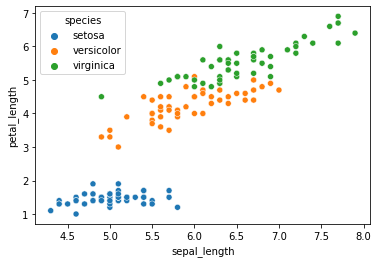

In [ ]:
# 이번에는 seaborn scatterplot 함수 활용해서 산점도 그리기
# 입력 : data=iris, x='sepal_length', y='petal_length', hue='species'

# 위와 똑같은 그래프지만, 붓꽃 종류로 분류해서 그래프
# 붓꽃 종류 3가지가 구분되어 보입니다. 

sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species')

---

# 3. X, y 나누기
- 지도학습 경우 데이터와 정답이 있어야 합니다.
- 데이터에 해당하는 X와 정답에 해당하는 y가 있어야 합니다.
- 아래와 같이 판다스를 이용하면 X, y를 쉽게 나눌수 있어요

In [ ]:
# IRIS 데이터 뒤 5개 보기

iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# X 분리 : 판다스 drop 함수 활용
# 입력 : 'species', axis=1

X = iris.drop('species', axis=1)

In [ ]:
# 분리된 X 확인 : 데이터 타입이 데이터프레임 확인

X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# y 분리 : 'species' 컬럼값만 분리

y = iris['species']

In [ ]:
# 분리된 y 확인 : 데이터 타입이 Series 확인
# y 값이 문자열로 되어 있음 확인

y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
# Series, DataFrame 형태를 numpy array 변경하기 
# 뒤쪽에서 타입이 맞지 않아서 에러 날수 있기 때문에
# X.values , y.values --> X , y 입력

X = X.values
y = y.values

In [ ]:
print(X[:2])
print(y[:2])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
['setosa' 'setosa']


In [ ]:
# y값이 숫자가 아니기에 컴퓨터가 잘 이해하지 못해 숫자로 변환
# setosa --> 0, versicolor --> 1, virginica --> 2 : LabelEncoding

from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. LabelEncoder 함수 정의 : le
# 2. y값에 대해 fit_transform 함수 이용해서 라벨인코딩 수행하고 다시 y에 저장
# 3. le.classes_ 출력해서 어떤 라벨들이 인코딩 되었는지 확인

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:
# y값들이 라벨인코딩되어 숫자로 표현됨 확인

y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

---

# 4. 머신러닝 모델링
- DecisionTree 결정트리
- RandomForest 앙상블

#### DecisionTree

![결정트리](http://gavinln.github.io/blog-site/img/decision_trees/tree-depth-2.png)

In [ ]:
# DecisionTree 머신러닝 모델링
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 1. DecisionTreeClassifier 모델 정의 -> dt 저장
# 2. dt 모델 학습 : X, y
# 3. dt 모델 성능확인 : X, y

dt = DecisionTreeClassifier()
dt.fit(X, y)
dt.score(X, y)

1.0

#### RandomForest

![RandomForest](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdDE2Rk%2FbtqvUzlulvU%2F6UbCGO8rHAhDJDCE3dyRr0%2Fimg.png)

In [ ]:
# RandomForest 머신러닝 모델링
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 1. RandomForestClassifier 모델 정의 -> rf 저장
# 2. rf 모델 학습 : X, y
# 3. rf 모델 성능확인 : X, y

rf = RandomForestClassifier()
rf.fit(X, y)
rf.score(X, y)

1.0

In [ ]:
# 150	라인 샘플 데이터 와 정답 출력
# setosa --> 0, versicolor --> 1, virginica --> 2

print(X[149])
print(y[149])

[5.9 3.  5.1 1.8]
2


In [ ]:
# 150	라인 샘플 데이터을 모델 입력해서 예측하기
# rf 모델의 predict 함수 활용
# 입력 : [X[149]], 결과 : pred 저장
# pred 결과 출력

pred = rf.predict([X[149]])
print(pred)

[2]


---

# 5. 딥러닝 모델링

In [ ]:
# 딥러닝 필요한 라이브러리 가져오기

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

![DNN](https://t1.daumcdn.net/cfile/tistory/9976DE33598420B531)

In [ ]:
# Sequential 모델 만들기 --> model 변수 저장
# input layer : (4, )
# hidden layer : 6 unit , activation='relu'
# output layer : 3 unit , activation

model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

In [ ]:
# 모델 컴파일 : compile
# loss='sparse_categorical_crossentropy'
# optimizer='adam'
# metrics=['accuracy']

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 학습 : fit
# X, y, epochs=10, batch_size=8
# 학습결과 저장 : history


history = model.fit(X, y, epochs=10, batch_size=8)

Epoch 1/10
19/19 [==============================] - 0s 2ms/step - loss: 1.1643 - accuracy: 0.3333
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 1.1252 - accuracy: 0.3333
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 1.0960 - accuracy: 0.3333
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 1.0740 - accuracy: 0.3333
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 1.0572 - accuracy: 0.3333
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 1.0439 - accuracy: 0.3333
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.0320 - accuracy: 0.3333
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 1.0210 - accuracy: 0.1933
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.3133
Epoch 10/10
19/19 [==============================] - 0s 1ms/step - loss: 0.9967 - accuracy: 0.3467


### 생각보자 정확도가 높지않네.. 좀더 공부시키자..

In [ ]:
# epochs 횟수 증가하여 모델 학습 : fit
# X, y, epochs=50, batch_size=8 --> epochs 50으로 변경
# 학습결과 저장 : history

history = model.fit(X, y, epochs=50, batch_size=8)

Epoch 1/50
19/19 [==============================] - 0s 2ms/step - loss: 0.9837 - accuracy: 0.3867
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.9698 - accuracy: 0.4867
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.9553 - accuracy: 0.5800
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.6333
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.9261 - accuracy: 0.6533
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.9124 - accuracy: 0.6533
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.8985 - accuracy: 0.6600
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.8856 - accuracy: 0.6600
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.8734 - accuracy: 0.6600
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.8615 - accuracy: 0.6667
Epoch 11/50
19/19 [

---

# 6. 딥러닝 성능 평가

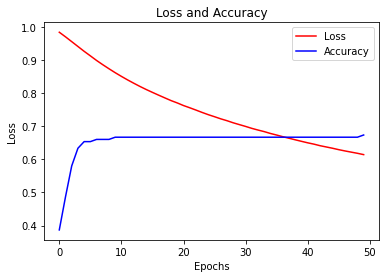

In [ ]:
# matplotlib 이용하여 그래프 그리기
# 1. plot 그리기 : 입력  history.history['loss'], 'r'
# 2. plot 그리기 : 입력  history.history['accuracy'], 'b'
# 3. title : 'Loss and Accuracy'
# 4. xlabel : "Epochs"
# 5. ylabel : "Loss"
# 6. legend : ["Loss", "Accuracy"]
# 7. plt.show()


plt.plot(history.history['loss'], 'r')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss and Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Accuracy"])
plt.show()